In [ ]:
# %pip install sslbookdata
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas


In [21]:
from sklearn.neighbors import kneighbors_graph
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.sparse as sp

import sslbookdata

O que eu tenho que fazer:
1) Construi grafos com duas etapas:
* Epsilon-neighbourhood / Shared Nearest Neighbour (Construção de grafo de adjacência)
* Jaccard / Cosseno (Geração de matriz ponderada)

2) Construção dos grafos usando um método baseado em densidade criando uma árvore geradora mínima

3) Implementar os métodos de aprendizado (Label difusion) que foram:
* GRF
* LGC
* LapRLS
* LapSVM
* RMGT

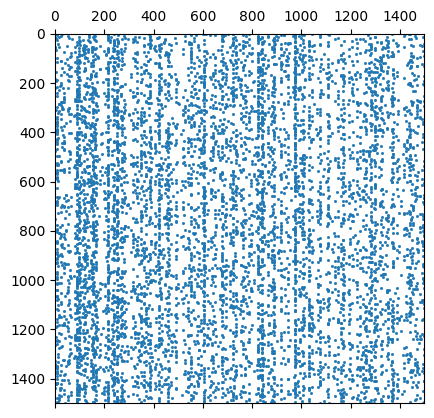

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
dataSet = sslbookdata.load_g241c(0)
# sslbookdata.load_

k = 5
graph = kneighbors_graph(dataSet['data'], k, mode='distance')

plt.spy(graph, markersize=1)
plt.show()

distances = graph.data
weights = np.exp(-distances**2)

weighted_matrix = sp.csr_matrix((weights, graph.indices, graph.indptr), shape=graph.shape)

print(weighted_matrix.toarray())


In [ ]:
# GRF: LabelPropagation(kernel='rbf', gamma=0.5)
# LGC: LabelPropagation(kernel='knn', n_neighbors=10, alpha=0.95, max_iter=1000, tol=1e-3)
# LapRLS: LabelPropagation(kernel='rbf', gamma=0.5, alpha=0.5, max_iter=1000, tol=1e-3, n_jobs=-1)
# LapSVM: SVC(kernel='rbf', gamma=0.5, C=C)
# RMGT: 

In [ ]:
def semi_supervised_learning(graph, labeled_data, unlabeled_data, labelPropagation):
    all_data = np.vstack((labeled_data, unlabeled_data))
    labels = np.full(len(all_data), -1)
    labels[:len(labeled_data)] = labeled_data_labels

    grf_classifier = labelPropagation

    grf_classifier.fit(all_data, labels)

    unlabeled_data_labels = grf_classifier.transduction_[len(labeled_data):]

    return unlabeled_data_labels
